In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pickle
from itertools import islice
import seaborn as sns

In [3]:
cd '/content/gdrive/My Drive/DataScience/Project'

/content/gdrive/My Drive/DataScience/Project


## Unzipping and Loading the dataset

In [ ]:
# !unzip 'dataset/companies.csv.zip' -d '/content/gdrive/My Drive/DataScience/Project/dataset'

Archive:  dataset/companies.csv.zip
  inflating: /content/gdrive/My Drive/DataScience/Project/dataset/companies.csv  
   creating: /content/gdrive/My Drive/DataScience/Project/dataset/__MACOSX/
  inflating: /content/gdrive/My Drive/DataScience/Project/dataset/__MACOSX/._companies.csv  


In [ ]:
# !unzip 'dataset/entities.zip' -d '/content/gdrive/My Drive/DataScience/Project/dataset'

Archive:  dataset/entities.zip
  inflating: /content/gdrive/My Drive/DataScience/Project/dataset/entities.csv  


In [ ]:
# !unzip 'dataset/tweets.csv.zip' -d '/content/gdrive/My Drive/DataScience/Project/dataset'

Archive:  dataset/tweets.csv.zip
  inflating: /content/gdrive/My Drive/DataScience/Project/dataset/tweets.csv  
  inflating: /content/gdrive/My Drive/DataScience/Project/dataset/__MACOSX/._tweets.csv  


In [ ]:
# !unzip 'dataset/users.csv.zip' -d '/content/gdrive/My Drive/DataScience/Project/dataset'

Archive:  dataset/users.csv.zip
  inflating: /content/gdrive/My Drive/DataScience/Project/dataset/users.csv  
  inflating: /content/gdrive/My Drive/DataScience/Project/dataset/__MACOSX/._users.csv  


In [4]:
companies = pd.read_csv('dataset/companies.csv')
entities = pd.read_csv('dataset/entities.csv')
tweets = pd.read_csv('dataset/tweets.csv')
users = pd.read_csv('dataset/users.csv', on_bad_lines='skip')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
tweets.head(5)

,id,text,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_user_id,lang,source,created_at
0,865326129644797957,RT @cruzfloresiv: To all the weak hands who so...,859451814940336128,0,0,865323140531896320,3005609114,en,"<a href=""http://twitter.com/download/iphone"" r...",Thu May 18 22:00:00 +0000 2017
1,865326133008642049,"Investors Eye Fed, But Bond ETFs Still Add Ass...",44060322,0,0,0,0,en,"<a href=""https://about.twitter.com/products/tw...",Thu May 18 22:00:01 +0000 2017
2,865326134262681600,Sell $NLNK (Ne❑wLink Genetics Corporation) tha...,713570637306986496,0,0,0,0,en,"<a href=""https://u.9999yea.rs/bots/"" rel=""nofo...",Thu May 18 22:00:02 +0000 2017
3,865326134917050368,Increase: $VCO $NTES $BPT $ENIC $QIWI $JP $STX...,823239593151655936,0,0,0,0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Thu May 18 22:00:02 +0000 2017
4,865326135952855040,"Former #FDA commissioner Califf joins Verily, ...",44367489,0,0,0,0,en,"<a href=""https://about.twitter.com/products/tw...",Thu May 18 22:00:02 +0000 2017


In [6]:
companies.head(5)

,ticker,name,exchange,capitalization
0,A,Agilent Technologies,NYSE,1.915000e+10
1,AA,Alcoa Corp,NYSE,6.480000e+09
2,AAAG,AAA Century Group US,OTCMKTS,9.480000e+06
3,AAAIF,ALTERNATIVE INV TR N,OTCMKTS,7.840000e+06
4,AAALF,AAREAL BANK AG NPV,OTCMKTS,1.720000e+09


In [7]:
entities.head(5)

,tweet_id,entity_type,text
0,865191269030612992,url,http://ih.advfn.com/p.php?pid=nmona&article=74...
1,865191269030612992,symbol,AMGN
2,865191271899570176,url,https://finance.yahoo.com/news/amgen-submits-b...
3,865191271899570176,hashtag,FDA
4,865191271899570176,hashtag,biotech


In [8]:
users.head(5)

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,time_zone,location,verified,description,created_at,bot
0,859451814940336128,Nao,sovereignao,2460,181,399,5247,6,NaN,en,Pacific Time (US & Canada),HODLing fast on,NaN,Self-sovereign,Tue May 02 16:57:35 +0000 2017,NaN
1,44060322,Benzinga.com,Benzinga,126228,59237,1617,2774,2310,http://www.benzinga.com/,en,Eastern Time (US & Canada),Zingernation,1.0,Financial news site. Creator of Benzinga Pro: ...,Tue Jun 02 04:43:10 +0000 2009,NaN
2,713570637306986496,Best Investings,bestinvestings,2718,27,0,0,3,NaN,en,Pacific Time (US & Canada),IN THE CHARTS,NaN,May or may not give you the best investing adv...,Sat Mar 26 03:37:52 +0000 2016,NaN
3,823239593151655936,thestocklist,thestocklist,447,25,9,3,2,http://thestocklist.com,en,Eastern Time (US & Canada),U.S.A.,NaN,Check out my new website http://thestocklist.c...,Sun Jan 22 18:43:08 +0000 2017,NaN
4,44367489,MM&M Magazine,MMMnews,11078,9277,548,90,783,http://www.mmm-online.com,en,Quito,"New York, NY, USA",NaN,"MM&M: the most objective, relevant, and timely...",Wed Jun 03 14:20:16 +0000 2009,NaN


## **1.** Statistics on most tweeted stocks


In [9]:
N_companies = len(companies)
print("Number of total companies in stock: ", N_companies)

Number of total companies in stock:  30032


In [10]:
N_tweets =  len(tweets)
print("Number of total tweets: ", N_tweets)

Number of total tweets:  9091539


**Important Note:** As the number of all tweets is too large and the analysis takes much time, I randomly selected N/600 of all tweets for the analysis.

In [11]:
N_tweets_new = int(N_tweets/600)
print('Number of tweets in the reduced dataframe: ', N_tweets_new)
tweets_reduced = tweets.sample(n=N_tweets_new,replace=False)

Number of tweets in the reduced dataframe:  15152


In [12]:
# cleaning the texts
companies['name'] = companies['name'].str.replace(r'(', '')
companies['name'] = companies['name'].str.replace(r')', '')
tweets_reduced['text'] = tweets_reduced['text'].str.replace(r'(', '')
tweets_reduced['text'] = tweets_reduced['text'].str.replace(r')', '')

<ipython-input-12-f608485baae9>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  companies['name'] = companies['name'].str.replace(r'(', '')
<ipython-input-12-f608485baae9>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  companies['name'] = companies['name'].str.replace(r')', '')
<ipython-input-12-f608485baae9>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tweets_reduced['text'] = tweets_reduced['text'].str.replace(r'(', '')
<ipython-input-12-f608485baae9>:5: FutureWarning: The default value of regex will change from

In [17]:
stocks_number_dict = dict.fromkeys(companies['name'], None)     # this dictionary will save the number of times eaah stock was mentioned in tweets

In [19]:
for stock in companies['name']:
  # counting number of tweets for the specified stock
  num = tweets_reduced['text'].str.count(stock).sum()
  stocks_number_dict[stock] = num

saving the stocks number dictionary:

In [20]:
try:
    file_dict = open('stocks_number_dict', 'wb')
    pickle.dump(stocks_number_dict, file_dict)
    file_dict.close()
except:
    print("Something went wrong in saving the doctionary")

loading the dictionary:

In [13]:
with open('stocks_number_dict', 'rb') as f:
    stocks_number_dict = pickle.load(f)

sorting the dictionary by its values: 

In [14]:
stocks_number_dict = dict(sorted(stocks_number_dict.items(), key=lambda item: item[1], reverse=True))

In [15]:
def take(n, iterable):
    """Return the first n items of the iterable as a list."""
    return list(islice(iterable, n))

In [16]:
Top_15_stocks = take(15, stocks_number_dict.items())

In [17]:
print('Top stocks with their corresponding tweet number: ')
Top_15_stocks

Top stocks with their corresponding tweet number: 


[('RH', 86),
 ('Jefferies Group LLC', 47),
 ('Morgan Stanley', 44),
 ('Piper Jaffray Compan', 26),
 ('Travelzoo', 25),
 ('Bank of America Corp', 21),
 ('Citigroup Inc', 17),
 ('Credit Suisse Group ', 17),
 ('Oppenheimer Holdings', 17),
 ('Bancorp Inc', 15),
 ('Raymond James Financ', 13),
 ('Ameriprise Financial', 10),
 ('Bank of New York Mel', 10),
 ('Chevron Corporation', 10),
 ('Prudential Financial', 10)]

In [18]:
top_stocks = list(list(zip(*Top_15_stocks))[0])
top_stocks_vals = list(list(zip(*Top_15_stocks))[1])

pie chart of most tweeted stocks:

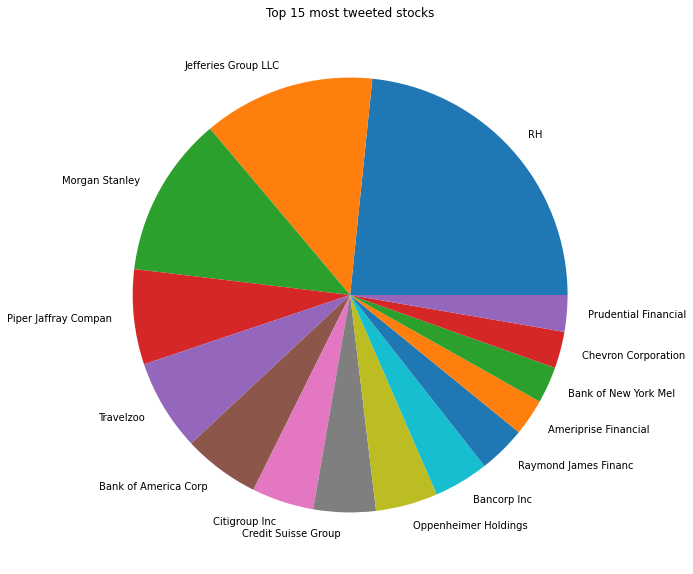

In [162]:
# Creating plot
fig = plt.figure(figsize =(14, 10))
plt.pie(top_stocks_vals, labels = top_stocks)
plt.title('Top 15 most tweeted stocks')
plt.show()

box plot:

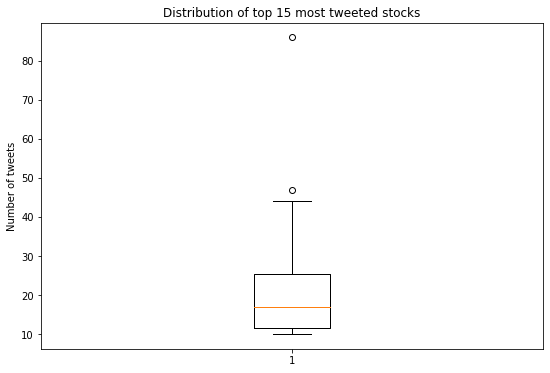

In [164]:
fig = figure(figsize=(9, 6))
plt.boxplot(top_stocks_vals)
plt.title('Distribution of top 15 most tweeted stocks')
plt.ylabel('Number of tweets')
plt.show()

## **2.** Statistics on distributions of tweets including individual stocks (at least 2) over time

In [20]:
# converting the data_created column to datetime object
tweets_reduced['created_at'] = pd.to_datetime(tweets_reduced['created_at'])

In [21]:
# sorting the dataframe by its creation time
tweets_reduced = tweets_reduced.sort_values(by='created_at')
tweets_reduced = tweets_reduced.reset_index()

This dictionary will save tweets ID along with number of individual stocks included in it:

In [22]:
tweets_Nstock = dict.fromkeys(tweets_reduced['id'], 0)     

In [23]:
for i in range(len(tweets_reduced)):
  tweet = tweets_reduced['text'][i]
  tweet.replace(r'(', '')
  tweet.replace(r')', '')
  id = tweets_reduced['id'][i]
  for stock in companies['name']:
    if stock in tweet:
      tweets_Nstock[id] += 1

In [24]:
tweets_Nstock = dict(sorted(tweets_Nstock.items(), key=lambda item: item[1], reverse=True))

saving the dictionary:

In [25]:
try:
    file_dict = open('tweets_Nstock', 'wb')
    pickle.dump(tweets_Nstock, file_dict)
    file_dict.close()
except:
    print("Something went wrong in saving the doctionary")

loading the dictionary:

In [41]:
with open('tweets_Nstock', 'rb') as f:
    tweets_Nstock = pickle.load(f)

Seperate tweets including at least 2 individual stocks:

In [42]:
desired_IDs = [k for k,v in tweets_Nstock.items() if v>=2]
Numstock_desired_IDs = [v for k,v in tweets_Nstock.items() if v>=2]

In [43]:
print('Number of tweets which include at least 2 individual stocks: ', len(desired_IDs))

Number of tweets which include at least 2 individual stocks:  534


creating a new dataframe with these tweets and their creation time:

In [44]:
desired_created_at = []
for i in range(len(desired_IDs)):
  desired_created_at.append( (tweets_reduced.loc[tweets_reduced['id'] == desired_IDs[i], 'created_at']).iloc[0] )

In [45]:
desired_IDs_dataframe = pd.DataFrame()
desired_IDs_dataframe['id'] = desired_IDs
desired_IDs_dataframe['Number_of_individual_stocks_included'] = Numstock_desired_IDs
desired_IDs_dataframe['created_at'] = desired_created_at
desired_IDs_dataframe['n'] = [1]*len(desired_created_at)

In [46]:
desired_IDs_dataframe.head(3)

,id,Number_of_individual_stocks_included,created_at,n
0,869116904396533760,8,2017-05-29 09:03:12+00:00,1
1,872843468007198724,8,2017-06-08 15:51:14+00:00,1
2,869307829219454978,7,2017-05-29 21:41:52+00:00,1


### Number of tweets including at least 2 stocks per day:

In [47]:
NumDaily_tweets = desired_IDs_dataframe.groupby(pd.PeriodIndex(desired_IDs_dataframe['created_at'], freq="D"))['n'].sum().reset_index()

In [48]:
NumDaily_tweets.head(3)

,created_at,n
0,2017-05-19,5
1,2017-05-20,5
2,2017-05-21,1


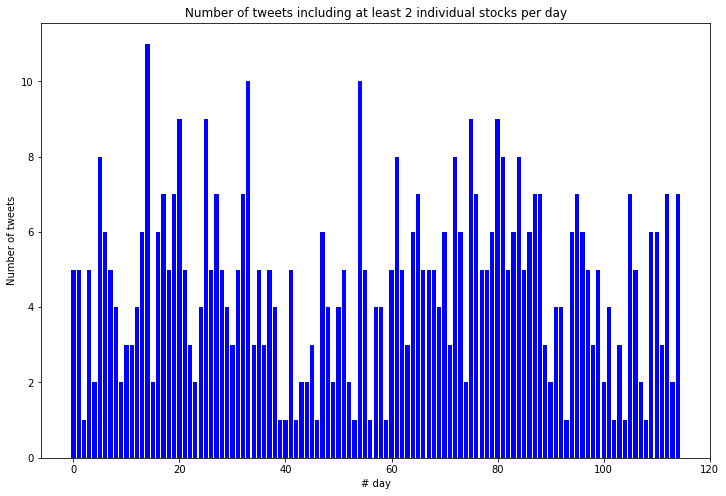

In [49]:
fig = figure(figsize=(12, 8))
plt.bar( np.arange(len(NumDaily_tweets)), NumDaily_tweets.n, color='blue')
plt.title('Number of tweets including at least 2 individual stocks per day')
plt.xlabel('# day')
plt.ylabel('Number of tweets')
plt.show()

box plot:

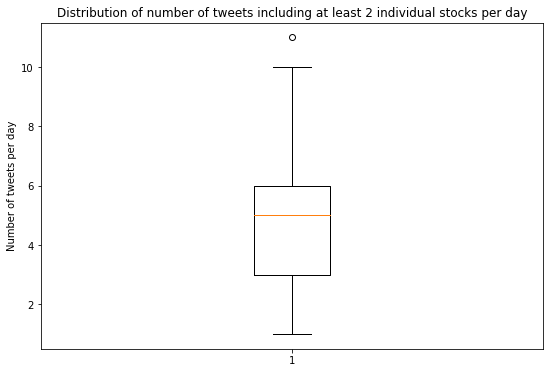

In [72]:
fig = figure(figsize=(9, 6))
plt.boxplot(NumDaily_tweets.n)
plt.title('Distribution of number of tweets including at least 2 individual stocks per day')
plt.ylabel('Number of tweets per day')
plt.show()

### Number of tweets including at least 2 stocks per week:

In [50]:
NumWeekly_tweets = desired_IDs_dataframe.groupby(pd.PeriodIndex(desired_IDs_dataframe['created_at'], freq="W"))['n'].sum().reset_index()

In [51]:
NumWeekly_tweets.head(3)

,created_at,n
0,2017-05-15/2017-05-21,11
1,2017-05-22/2017-05-28,32
2,2017-05-29/2017-06-04,35


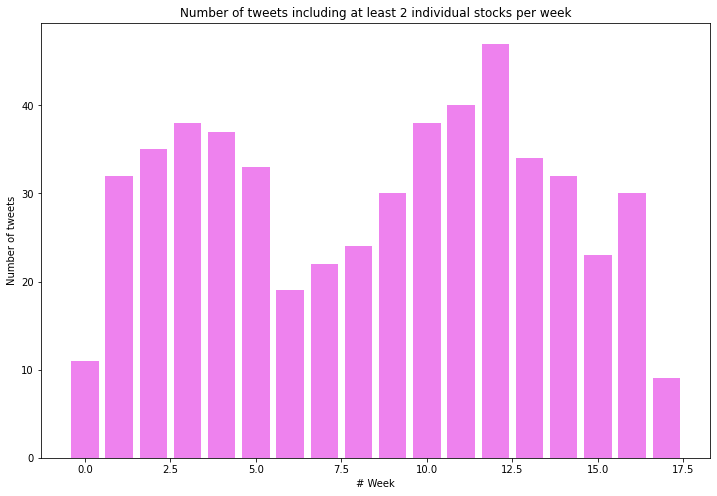

In [52]:
fig = figure(figsize=(12, 8))
plt.bar( np.arange(len(NumWeekly_tweets)), NumWeekly_tweets.n, color='violet')
plt.title('Number of tweets including at least 2 individual stocks per week')
plt.xlabel('# Week')
plt.ylabel('Number of tweets')
plt.show()

box plot:

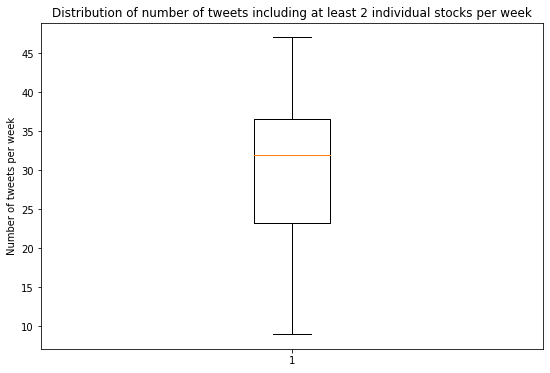

In [69]:
fig = figure(figsize=(9, 6))
plt.boxplot(NumWeekly_tweets.n)
plt.title('Distribution of number of tweets including at least 2 individual stocks per week')
plt.ylabel('Number of tweets per week')
plt.show()

### Number of tweets including at least 2 stocks per month:

In [53]:
NumMonthly_tweets = desired_IDs_dataframe.groupby(pd.PeriodIndex(desired_IDs_dataframe['created_at'], freq="M"))['n'].sum().reset_index()

In [54]:
NumMonthly_tweets

,created_at,n
0,2017-05,53
1,2017-06,149
2,2017-07,120
3,2017-08,162
4,2017-09,50


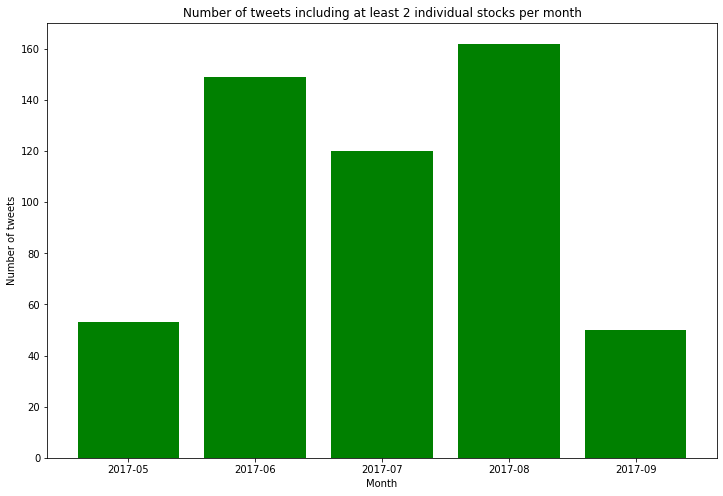

In [55]:
fig = figure(figsize=(12, 8))
plt.bar( ['2017-05', '2017-06', '2017-07', '2017-08', '2017-09'], NumMonthly_tweets.n, color='green')
plt.title('Number of tweets including at least 2 individual stocks per month')
plt.xlabel('Month')
plt.ylabel('Number of tweets')
plt.show()

box plot:

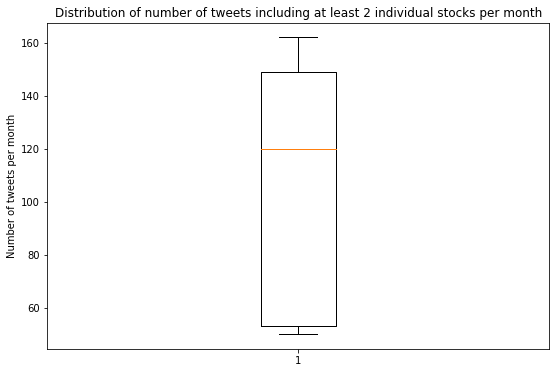

In [73]:
fig = figure(figsize=(9, 6))
plt.boxplot(NumMonthly_tweets.n)
plt.title('Distribution of number of tweets including at least 2 individual stocks per month')
plt.ylabel('Number of tweets per month')
plt.show()

Number of tweets including at least 2 stocks per hour:

In [157]:
desired_IDs_dataframe['Hour'] = pd.to_datetime(desired_IDs_dataframe['created_at'],format='%H:%M:%S').dt.hour

In [158]:
desired_IDs_dataframe.head(5)

,id,Number_of_individual_stocks_included,created_at,n,Hour
0,869116904396533760,8,2017-05-29 09:03:12+00:00,1,9
1,872843468007198724,8,2017-06-08 15:51:14+00:00,1,15
2,869307829219454978,7,2017-05-29 21:41:52+00:00,1,21
3,876075574514642946,7,2017-06-17 13:54:28+00:00,1,13
4,877915445608693760,7,2017-06-22 15:45:27+00:00,1,15


In [159]:
PerHour_tweets = desired_IDs_dataframe.groupby(['Hour'])['n'].sum()

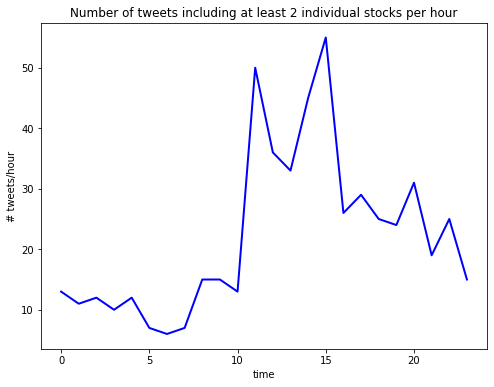

In [160]:
fig = figure(figsize=(8, 6))
plt.plot(PerHour_tweets, color='b', linewidth=2)
plt.xlabel('time')
plt.ylabel('# tweets/hour')
plt.title('Number of tweets including at least 2 individual stocks per hour')
plt.show()

As it can be seen, peak hours are between 10 to 15, which has overlap with the opening hours of the New York Stock Exchange.

## 3. Statistics on distributions of all financial tweets over time

For this part, I again use `tweets_Nstock` dictionary obtained in the previous part, which contains tweets IDs as keys and number of individual stocks included in each tweet as values.

Taking the tweets which include at least 1 stock name:

In [76]:
financial_tweets_ID = [k for k,v in tweets_Nstock.items() if v>=1]

In [80]:
print('There are', len(financial_tweets_ID), 'financial tweets.')

There are 3468 financial tweets.


In [88]:
financial_tweets = pd.DataFrame()
financial_tweets['created_at'] = ( tweets_reduced.loc[tweets_reduced['id'].isin(financial_tweets_ID), 'created_at'] ) 
financial_tweets['n'] = [1]*len(financial_tweets_ID)

In [89]:
financial_tweets.head(5)

,created_at,n
2,2017-05-18 22:09:35+00:00,1
4,2017-05-18 22:46:11+00:00,1
5,2017-05-18 22:46:12+00:00,1
9,2017-05-18 23:56:18+00:00,1
10,2017-05-19 00:09:46+00:00,1


### Number of financial tweets per day:

In [90]:
NumDaily_financial_tweets = financial_tweets.groupby(pd.PeriodIndex(financial_tweets['created_at'], freq="D"))['n'].sum().reset_index()

In [92]:
NumDaily_financial_tweets.head(5)

,created_at,n
0,2017-05-18,4
1,2017-05-19,36
2,2017-05-20,30
3,2017-05-21,20
4,2017-05-22,34


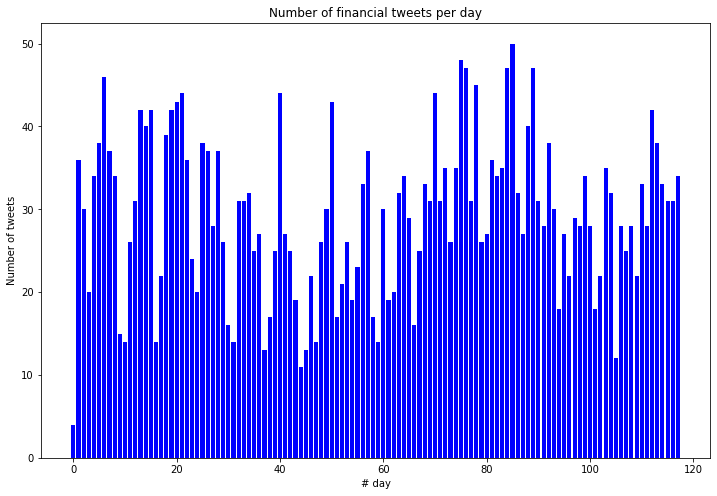

In [93]:
fig = figure(figsize=(12, 8))
plt.bar( np.arange(len(NumDaily_financial_tweets)), NumDaily_financial_tweets.n, color='blue')
plt.title('Number of financial tweets per day')
plt.xlabel('# day')
plt.ylabel('Number of tweets')
plt.show()

box plot:

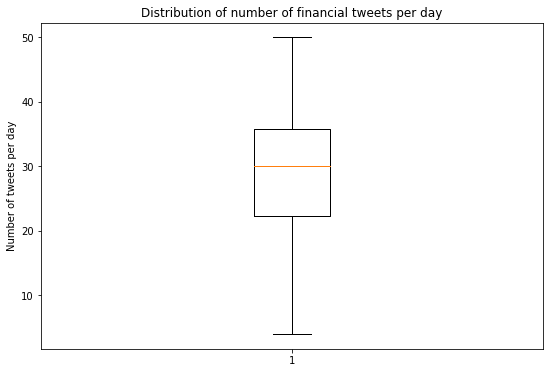

In [94]:
fig = figure(figsize=(9, 6))
plt.boxplot(NumDaily_financial_tweets.n)
plt.title('Distribution of number of financial tweets per day')
plt.ylabel('Number of tweets per day')
plt.show()

### Number of financial tweets per week:

In [95]:
NumWeekly_financial_tweets = financial_tweets.groupby(pd.PeriodIndex(financial_tweets['created_at'], freq="W"))['n'].sum().reset_index()

In [96]:
NumWeekly_financial_tweets.head(5)

,created_at,n
0,2017-05-15/2017-05-21,90
1,2017-05-22/2017-05-28,218
2,2017-05-29/2017-06-04,217
3,2017-06-05/2017-06-11,248
4,2017-06-12/2017-06-18,196


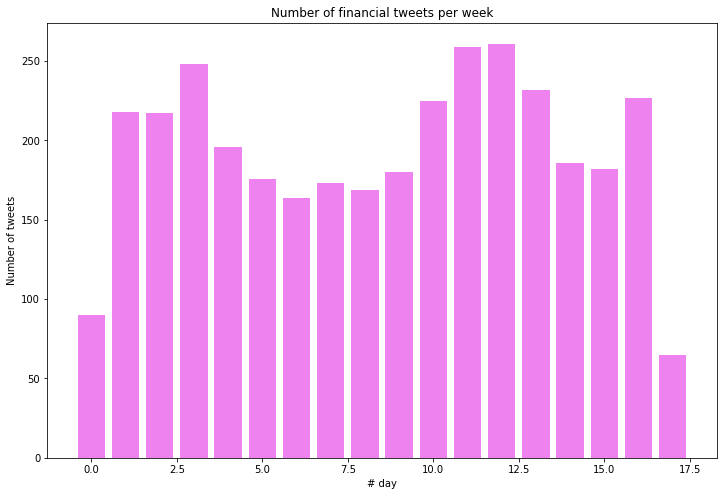

In [97]:
fig = figure(figsize=(12, 8))
plt.bar( np.arange(len(NumWeekly_financial_tweets)), NumWeekly_financial_tweets.n, color='violet')
plt.title('Number of financial tweets per week')
plt.xlabel('# day')
plt.ylabel('Number of tweets')
plt.show()

box plot:

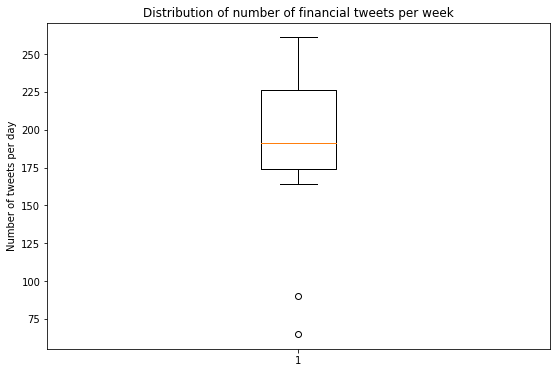

In [98]:
fig = figure(figsize=(9, 6))
plt.boxplot(NumWeekly_financial_tweets.n)
plt.title('Distribution of number of financial tweets per week')
plt.ylabel('Number of tweets per day')
plt.show()

### Number of financial tweets per month:

In [99]:
NumMonthly_financial_tweets = financial_tweets.groupby(pd.PeriodIndex(financial_tweets['created_at'], freq="M"))['n'].sum().reset_index()

In [101]:
NumMonthly_financial_tweets

,created_at,n
0,2017-05,407
1,2017-06,878
2,2017-07,806
3,2017-08,1004
4,2017-09,373


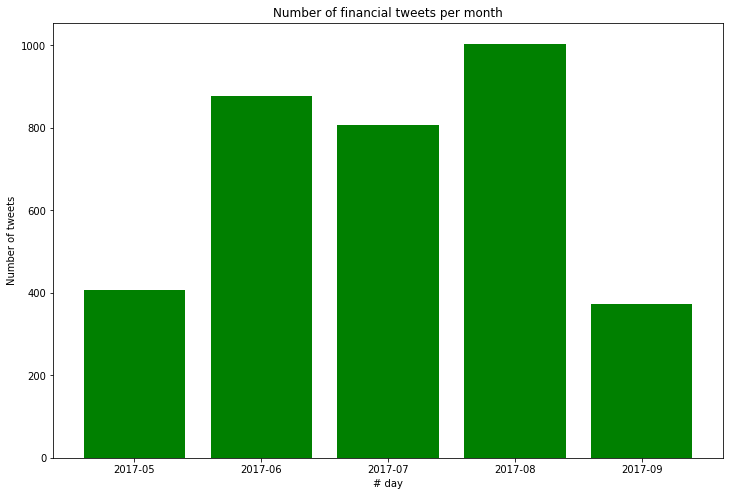

In [102]:
fig = figure(figsize=(12, 8))
plt.bar( ['2017-05', '2017-06', '2017-07', '2017-08', '2017-09'], NumMonthly_financial_tweets.n, color='green')
plt.title('Number of financial tweets per month')
plt.xlabel('# day')
plt.ylabel('Number of tweets')
plt.show()

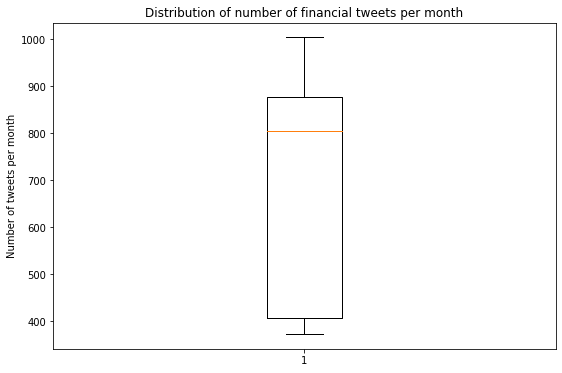

In [103]:
fig = figure(figsize=(9, 6))
plt.boxplot(NumMonthly_financial_tweets.n)
plt.title('Distribution of number of financial tweets per month')
plt.ylabel('Number of tweets per month')
plt.show()

### Number of financial tweets per hour:

In [136]:
financial_tweets['Hour'] = pd.to_datetime(financial_tweets['created_at'],format='%H:%M:%S').dt.hour

In [138]:
financial_tweets.head(5)

,created_at,n,Hour
2,2017-05-18 22:09:35+00:00,1,22
4,2017-05-18 22:46:11+00:00,1,22
5,2017-05-18 22:46:12+00:00,1,22
9,2017-05-18 23:56:18+00:00,1,23
10,2017-05-19 00:09:46+00:00,1,0


In [143]:
PerHour_financial_tweets = financial_tweets.groupby(['Hour'])['n'].sum()

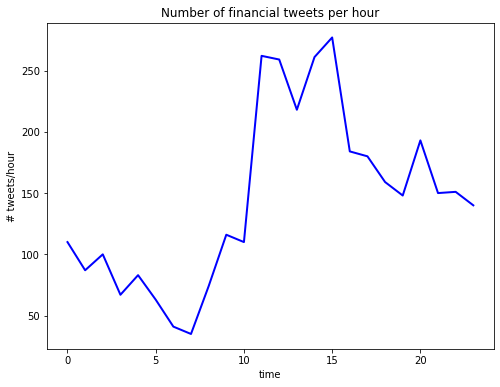

In [156]:
fig = figure(figsize=(8, 6))
plt.plot(PerHour_financial_tweets, color='b', linewidth=2)
plt.xlabel('time')
plt.ylabel('# tweets/hour')
plt.title('Number of financial tweets per hour')
plt.show()

As it can be seen, peak hours are between 10 to 15, which has overlap with the opening hours of the New York Stock Exchange.

## **4.** Statistics on distribution of retweets per tweets including individual stocks (at least 2)

## **5.** Statistics on most important financial information on individual stocks (at least 2)

In [161]:
companies.head(5)

,ticker,name,exchange,capitalization
0,A,Agilent Technologies,NYSE,1.915000e+10
1,AA,Alcoa Corp,NYSE,6.480000e+09
2,AAAG,AAA Century Group US,OTCMKTS,9.480000e+06
3,AAAIF,ALTERNATIVE INV TR N,OTCMKTS,7.840000e+06
4,AAALF,AAREAL BANK AG NPV,OTCMKTS,1.720000e+09


In [170]:
capitalization_mean = companies['capitalization'].mean()
capitalization_min = np.min(companies['capitalization'])
capitalization_max = np.max(companies['capitalization'])
capitalization_std = companies['capitalization'].std()

In [172]:
print('mean of capitalization of stocks: ', capitalization_mean)
print('minimum of capitalization of stocks: ', capitalization_min)
print('maximum of capitalization of stocks: ', capitalization_max)
print('std of capitalization of stocks: ', capitalization_std)

mean of capitalization of stocks:  3853382084.657337
minimum of capitalization of stocks:  0.0
maximum of capitalization of stocks:  748550000000.0
std of capitalization of stocks:  17934858923.053474


In [179]:
capitalization = list(companies['capitalization'])
capitalization = [x for x in capitalization if str(x)!='nan']

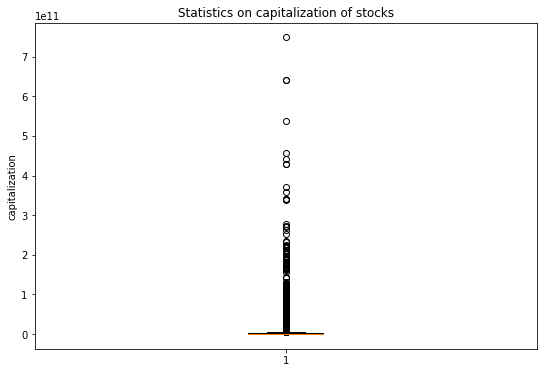

In [180]:
fig = figure(figsize=(9, 6))
plt.boxplot(capitalization)
plt.title('Statistics on capitalization of stocks')
plt.ylabel('capitalization')
plt.show()

In [239]:
a = companies['name'].tolist()

In [273]:
groupby_exchange_TotCap = companies.groupby(['exchange'])['capitalization'].sum()
groupby_exchange_TotCap = groupby_exchange_TotCap.to_frame()

groupby_exchange_MedCap = companies.groupby(['exchange'])['capitalization'].median()
groupby_exchange_MedCap = groupby_exchange_MedCap.to_frame()

#groupby_exchange_companies = companies.groupby(['exchange'])['name']
#groupby_exchange_companies = groupby_exchange_companies.to_frame()

In [274]:
FinancialInfo = pd.DataFrame()
FinancialInfo['Exchange'] = groupby_exchange_TotCap.index
FinancialInfo['Total_capitalization'] = groupby_exchange_TotCap['capitalization'].tolist()
FinancialInfo['Median_capitalization'] = groupby_exchange_MedCap['capitalization'].tolist()

In [275]:
FinancialInfo

,Exchange,Total_capitalization,Median_capitalization
0,NASDAQ,1.052047e+13,3.657800e+08
1,NYSE,2.869147e+13,1.810000e+09
2,NYSEARCA,2.226486e+12,2.453750e+08
3,NYSEMKT,2.560778e+11,7.870500e+07
4,OTCMKTS,4.545744e+13,3.129000e+07
